<a href="https://colab.research.google.com/github/LukasPurbaW/Item_Recommendation/blob/main/Apriori_Recommendation_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 1 : https://www.kaggle.com/carrie1/ecommerce-data

UK E: commerce data : https://drive.google.com/file/d/1Re8bNtiVZhutdNLpgEZmNm3EcLKoBMCY/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
#Lukas updated 25 February 2022
sheet_url = 'https://drive.google.com/file/d/1Re8bNtiVZhutdNLpgEZmNm3EcLKoBMCY/view?usp=sharing'
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Data_Ecommerce = pd.read_csv(sheet_url,encoding= 'unicode_escape')
Data_Ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Cleaning

In [7]:
Data_Ecommerce.isnull().sum()
Data_Ecommerce = Data_Ecommerce.dropna()
print(Data_Ecommerce.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


-- Create a prediction and a recommendation system for customers based on their buying pattern  UK E-commerce (Lukas)

In [8]:
import numpy as np
item_counts = Data_Ecommerce["Description"].value_counts()
item_counts = pd.DataFrame(item_counts)
item_counts = item_counts.sort_values(by=['Description'], ascending = False)
np.shape(item_counts)

(3896, 1)

In [9]:
data = Data_Ecommerce
lista= data['StockCode'].unique() 
stock_to_del=[]
for el in lista:
    if el[0] not in ['1','2','3','4','5','6','7','8','9','10']: # products corresponding to gifts. 
        stock_to_del.append(el)

data=data[data['StockCode'].map(lambda x: x not in stock_to_del)] # delete these products

basket = data.groupby(['InvoiceNo','CustomerID']).agg({'Description': lambda s: list(set(s))}) # grouping product from the same invoice. 

print('Dimension of the new grouped dataset : ', basket.shape)
print('----------')
basket.head()

Dimension of the new grouped dataset :  (21788, 1)
----------


,,Description
InvoiceNo,CustomerID,
536365,17850.0,"[SET 7 BABUSHKA NESTING BOXES, WHITE METAL LAN..."
536366,17850.0,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,13047.0,"[BOX OF VINTAGE ALPHABET BLOCKS, POPPY'S PLAYH..."
536368,13047.0,"[YELLOW COAT RACK PARIS FASHION, BLUE COAT RAC..."
536369,13047.0,[BATH BUILDING BLOCK WORD]


In [10]:
new_basket = basket.Description.apply(pd.Series)
new_basket.head(2)

,,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
InvoiceNo,CustomerID,,,,,,,,,,,,,,,,,,,,,
536365,17850.0,SET 7 BABUSHKA NESTING BOXES,WHITE METAL LANTERN,GLASS STAR FROSTED T-LIGHT HOLDER,RED WOOLLY HOTTIE WHITE HEART.,KNITTED UNION FLAG HOT WATER BOTTLE,WHITE HANGING HEART T-LIGHT HOLDER,CREAM CUPID HEARTS COAT HANGER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,17850.0,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
!pip -q install apyori

In [12]:
transactions = []
for i in range(0, 21788):
  transactions.append([str(new_basket.values[i,j]) for j in range(0,540)])
np.shape(transactions)

(21788, 540)

## Training Apriori Model

In [13]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Putting the Results into a dataframe

In [14]:
results = list(rules)
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
Apriori = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [15]:
### Displaying the results non sorted
Apriori.head(5)
### Displaying the results sorted
Apriori = Apriori.sort_values(by=['Confidence'], ascending = False)
Apriori = Apriori.reset_index()
Apriori.head(5)
# more info about association rule apriori : https://towardsdatascience.com/association-rules-2-aa9a77241654

,index,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,815,HERB MARKER CHIVES,HERB MARKER PARSLEY,0.007160,0.934132,108.259906
1,821,HERB MARKER PARSLEY,HERB MARKER ROSEMARY,0.008032,0.930851,106.185251
2,817,HERB MARKER CHIVES,HERB MARKER THYME,0.007114,0.928144,108.141151
3,816,HERB MARKER CHIVES,HERB MARKER ROSEMARY,0.007114,0.928144,105.876415
4,814,HERB MARKER CHIVES,HERB MARKER MINT,0.007114,0.928144,105.324975


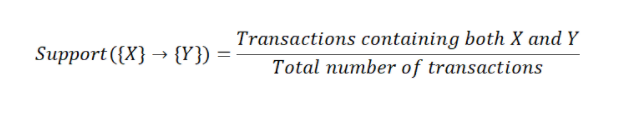

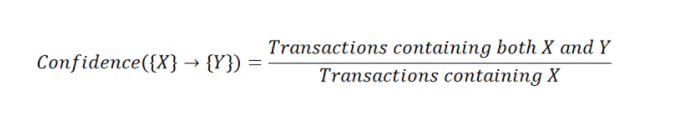

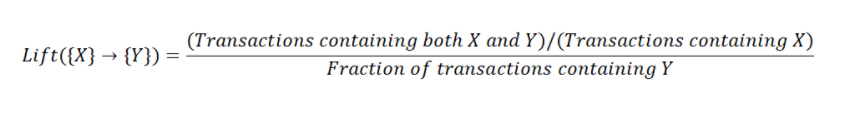

In [18]:
import shutil
import os
def remove_folder(path):
    # check if folder exists
    if os.path.exists(path):
         # remove if exists
         shutil.rmtree(path)
         print("done removing")
    else:
         # throw your exception to handle this special scenario
         print("no file")

remove_folder("./content/images")

!rm "Images_250_more_transactions.zip"
!rm "Images_more_than_150_and_less_than_249_transaction.zip"

no file
no file
rm: cannot remove 'Images_250_more_transactions.zip': No such file or directory
rm: cannot remove 'Images_more_than_150_and_less_than_249_transaction.zip': No such file or directory


In [19]:
## Show Images
Image_150_more_249_less_transaction = "https://github.com/LukasPurbaW/Item_Recommendation/raw/main/Images_more_than_150_and_less_than_249_transaction.zip"
!wget -qq https://github.com/LukasPurbaW/Item_Recommendation/raw/main/Images_more_than_150_and_less_than_249_transaction.zip

Image_250_more_transaction = 'https://github.com/LukasPurbaW/Item_Recommendation/raw/main/Images_250_more_transactions.zip'
!wget -qq https://github.com/LukasPurbaW/Item_Recommendation/raw/main/Images_250_more_transactions.zip

In [20]:
!unzip -qq /content/Images_250_more_transactions.zip
#src = "./content/images"
#dst = "./content/images250"
#os.rename(src, dst)

!unzip -qq /content/Images_more_than_150_and_less_than_249_transaction.zip
#src = "./content/images"
#dst = "./content/images150_249"
#os.rename(src, dst)

item exist
item exist


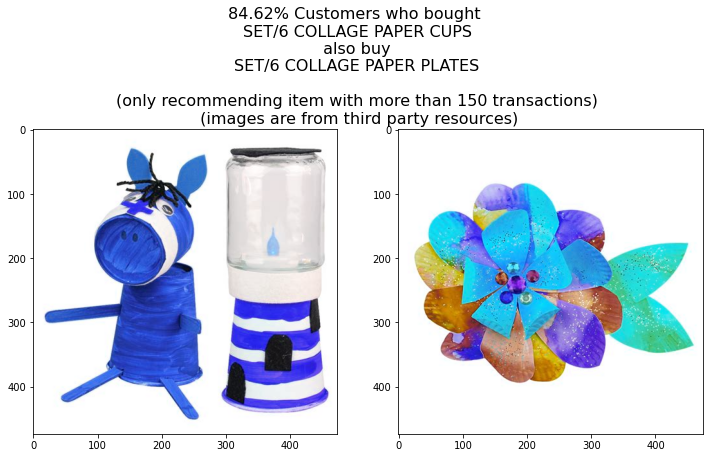

In [24]:
import glob, random
from IPython.display import Image
import cv2 as cv
import matplotlib.pyplot as plt
Item_number = 18
#try 1,5,12,15,18,21,43

item_name =[]
j = Apriori["Left Hand Side"][Item_number]
item_name.append(j)
L = Apriori["Right Hand Side"][Item_number]
item_name.append(L)
final_image = []

path = "./content/images/"+str(j)+" buy"
if os.path.exists(path):
      # remove if exists
      print("item exist")
      file_path_type = ["./content/images/"+str(j)+" buy"+"/*.jpg"]
      images = glob.glob(random.choice(file_path_type))
      random_image = random.choice(images)
      final_image1 = cv.imread(random_image)

final_image.append(final_image1)

path = "./content/images/"+str(L)+" buy"
if os.path.exists(path):
      # remove if exists
      print("item exist")
      file_path_type = ["./content/images/"+str(L)+" buy"+"/*.jpg"]
      images = glob.glob(random.choice(file_path_type))
      random_image = random.choice(images)
      final_image2 = cv.imread(random_image)

final_image.append(final_image2)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs = axs.flatten()
for img, ax in zip(final_image, axs):
    ax.imshow(img)

fig.suptitle(str(round(Apriori.Confidence[Item_number]*100,2))+'% Customers who bought ' + 
             "\n" + str(j) + '\n also buy \n'+ str(L) + '\n \n(only recommending item with more than 150 transactions)' + 
             '\n (images are from third party resources)', fontsize=16)

plt.show()